In [1]:
import os
import pandas as pd
import random

In [2]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yaml
from PIL import Image, ImageDraw, ImageFont
from scipy.signal import butter, filtfilt

In [16]:
fold = 6

In [17]:
os.listdir('/home/ds/app/data/10_fold/')

['fold_3',
 'fold_6',
 'fold_8',
 'fold_7',
 'fold_10',
 'fold_5',
 'fold_9',
 'fold_4',
 'fold_1',
 'dataset_formated.csv',
 'fold_2']

In [18]:
#os.listdir(path_pred)

In [19]:
path_targ   = f'/home/ds/app/data/10_fold/fold_{fold}/test/labels/'
path_pred   = f'runs/test/fold_{fold}/labels/'
path_images = f'/home/ds/app/data/10_fold/fold_{fold}/test/images/'

In [20]:
images = os.listdir(path_images)
objects = [name.split('.')[0] for name in images]
len(objects)

51

In [21]:
obj = 'IMG_0348'#'IMG_20230628_182604' #objects[0]
obj in objects

True

In [22]:
def xywhn2xyxy(x, w=640, h=640, padw=0, padh=0):
    # Convert nx4 boxes from [x, y, w, h] normalized to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = np.copy(x)
    y[:, 0] = w * (x[:, 0] - x[:, 2] / 2) + padw  # top left x
    y[:, 1] = h * (x[:, 1] - x[:, 3] / 2) + padh  # top left y
    y[:, 2] = w * (x[:, 0] + x[:, 2] / 2) + padw  # bottom right x
    y[:, 3] = h * (x[:, 1] + x[:, 3] / 2) + padh  # bottom right y
    return y

In [23]:
def get_bbox_to_txt(fpath, classe=1):
    df = pd.read_csv(fpath, header=None)
    array = df.to_numpy()
    array_conver = [str(a[0]).split(' ')[classe:] for a in array]
    return np.array(array_conver, dtype='float32')

In [24]:
def plot_one_box(x, img, color=None, label=None, line_thickness=10):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

In [25]:
mark_pred = get_bbox_to_txt(f"{path_pred}{obj}.txt")
mark_esp  = get_bbox_to_txt(f"{path_targ}{obj}.txt")

In [26]:
mark_esp.shape, mark_pred.shape

((1, 4), (1, 5))

In [27]:
#image = cv2.imread(f"{path_images}{images[0]}")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = np.asarray(image)

In [28]:
c_esp = [0, 153, 51]
c_det = [255, 51, 0]

In [29]:
# read image
image = cv2.imread(f"{path_images}{obj}.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (640, 640))

In [30]:
mark_esp = xywhn2xyxy(mark_esp, w=image.shape[0], h=image.shape[1])
#mark_pred_f = xywhn2xyxy(mark_pred[:,:4], w=image.shape[0], h=image.shape[1])

In [31]:
mark_esp

array([[335.7143, 288.4656, 405.7143, 374.3915]], dtype=float32)

In [32]:
#labels = mark_pred[:,-1]

In [33]:
#mark_esp.shape, mark_pred_f.shape

In [34]:
# plot all esp
if True:
    for bbox in mark_esp:
        plot_one_box(bbox, image, color=c_esp, line_thickness=1)
    # plot all yolo 
    #for i, bbox in enumerate(mark_pred_f):
    #    plot_one_box(bbox, image, color=c_det, label=f"{labels[i]:.2f}", line_thickness=1)

In [35]:
#plot_one_box(bbox, image, color=c_esp, line_thickness=1)
#plot_one_box(bbox, image, color=c_det, line_thickness=1)

In [36]:
# single bbox
if False:
    image = cv2.imread(f"{path_images}{obj}.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (640, 640))
    idx = 0
    plot_one_box(mark_esp[idx,:], image, color=c_esp, line_thickness=1)
    #plot_one_box(mark_pred_f[idx,:], image, color=c_det, line_thickness=1)
    plt.figure(figsize=(12, 12))
    
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()

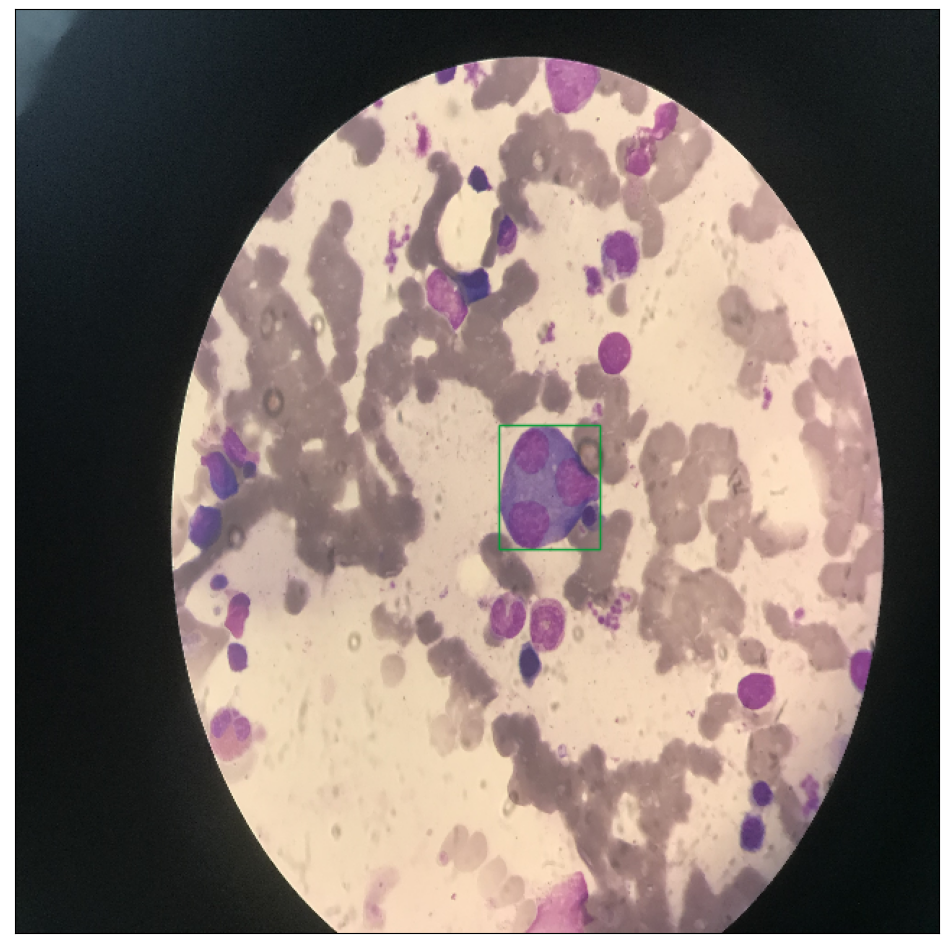

In [37]:
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
cv2.imwrite(f'predictions/{obj}.jpg', image)

True

In [23]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
'''
image = cv2.imread(f"{path_images}{images[0]}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
'''

In [ ]:
label='mieloma'
line_thickness=1
mark_esp = xywhn2xyxy(mark_esp, w=image.shape[0], h=image.shape[1])
for x in mark_esp:    
    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = [151, 52, 19]#random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    print(c1, c2, color)
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#cv2.imwrite(f'{images[0]}', img_mark)